## Import the libraries and Import the CSV file from the Cleaning phase

In [1]:
from functools import reduce
import numpy as np
import pandas as pd
import re

In [2]:
df_analysis = pd.read_csv("/home/carolina/Desktop/IRONHACK/Project files/clean_shark_attacks.csv", encoding="latin-1")

In [3]:
display(df_analysis.head(15))
df_analysis.shape

,Year,Type,Country,Activity,Sex,Age,Fatal (Y/N),Species,Decada
0,2018.0,Unprovoked,USA,Treading water,F,11.0,N,Not Available,2010
1,2018.0,Not Available,USA,Surfing,M,48.0,N,Not Available,2010
2,2018.0,Unprovoked,BRAZIL,Swimming,M,18.0,Y,Tiger Shar,2010
3,2018.0,Unprovoked,USA,Fishing,M,52.0,N,Not Available,2010
4,2018.0,Unprovoked,USA,Treading water,M,15.0,N,Bull Shark,2010
5,2018.0,Unprovoked,USA,Treading water,M,12.0,N,Not Available,2010
6,2018.0,Provoked,AUSTRALIA,Interacting with sharks,M,32.0,N,Not Available,2010
7,2018.0,Unprovoked,USA,Surfing,M,10.0,N,Not Available,2010
8,2018.0,Unprovoked,USA,Swimming,M,10.0,N,Not Available,2010
9,2018.0,Provoked,AUSTRALIA,Interacting with sharks,F,34.0,N,Not Available,2010


(2517, 9)

## Insert the column Nº of cases, so we can sum up on the analysis

In [4]:
df_analysis["Nº of Cases"] = 1

In [17]:
#df_analysis.head(15)

## Test the Group By func. to have a major picture of the Pivot table we want to create

In [6]:
analysis = df_analysis.groupby(["Country", "Activity", "Fatal (Y/N)"]).agg({"Nº of Cases":["sum"]})

analysis

Nº of Cases
                                                          sum
Country     Activity                Fatal (Y/N)              
AFRICA      Diving                  N                      17
                                    Y                       1
            Fell into the water     N                       1
            Fishing                 N                      60
                                    Y                       7
            Interacting with sharks N                       5
            Not Available           N                       3
                                    Y                       1
            Others                  N                       8
                                    Y                       1
            Surfing                 N                     108
                                    Y                      18
            Swimming                N                      42
                                    Y                      19
            Treading water          N                      16
                                    Y                       3
AUSTRALIA   Diving                  N                      49
                                    Y                      23
            Fell into the water     N                       2
            Fishing                 N                      87
                                    Y                      11
            Interacting with sharks N                      10
            Kayaking                N                       9
            Not Available           N                      18
                                    Not Available           2
                                    Y                       1
            Others                  N                       2
            Sailing                 N                       1
                                    Y                       2
            Surfing                 N                     172
...                                                       ...
PHILIPPINES Swimming                N                       3
                                    Y                       1
REUNION     Fishing                 N                       2
            Kayaking                N                       1
            Surfing                 N                      18
                                    Y                      11
            Swimming                Y                       3
SPAIN       Surfing                 N                       1
            Swimming                N                      11
USA         Diving                  N                      85
                                    Y                      13
            Fell into the water     Y                       1
            Fishing                 N                     114
                                    Y                       6
            Interacting with sharks N                      13
            Kayaking                N                      11
                                    Y                       1
            Not Available           N                      38
                                    Y                       2
            Others                  N                       4
                                    Y                       2
            Sailing                 N                       5
            Surfing                 N                     627
                                    Not Available           1
                                    Y                      11
            Swimming                N                     304
                                    Not Available           2
                                    Y                      16
            Treading water          N                      62
                                    Y                       1

[155 rows x 1 columns]

## First Filter: Only Surfing

In [8]:
first = df_analysis[df_analysis.Activity == "Surfing"][["Country", "Activity", "Fatal (Y/N)", "Nº of Cases"]]


## Outputs: 

From 2.517 shark attacks, 1.051 were when people were Surfing.

In [9]:
first.describe()

,Nº of Cases
count,1051.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


## Second Filter: Only in Australia

In [12]:
second = first[first.Country == "AUSTRALIA"][["Country", "Activity", "Fatal (Y/N)", "Nº of Cases"]]


## Output:

From the 1.051 shark attacks on Surfers, Australia has 197 cases of attack.  

In [13]:
second.describe()

,Nº of Cases
count,197.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


# ANALYSIS: 

## RESULT:

From the 197 shark attackon surfers in Australia, only 24 were fatal, which proves that our hypothesis are wrong.

## The majority of surfers attacked by a shark in Australia are not fatal.

In [14]:
Analysis = second.groupby(["Country", "Activity", "Fatal (Y/N)"]).agg({"Nº of Cases":["sum"]})

Analysis

Nº of Cases
                                         sum
Country   Activity Fatal (Y/N)              
AUSTRALIA Surfing  N                     172
                   Not Available           1
                   Y                      24

## Pivot Table

In [26]:
tabla = Analysis.pivot_table(index='Fatal (Y/N)', columns='Activity', aggfunc= sum, fill_value=0)

In [27]:
tabla

,Nº of Cases
,sum
Activity,Surfing
Fatal (Y/N),
N,172
Not Available,1
Y,24


## Chart:

Where we can see in "N" the cases that were not fatal, in "Y" the cases that were fatal and in "Not Available" the cases that we don't know. 

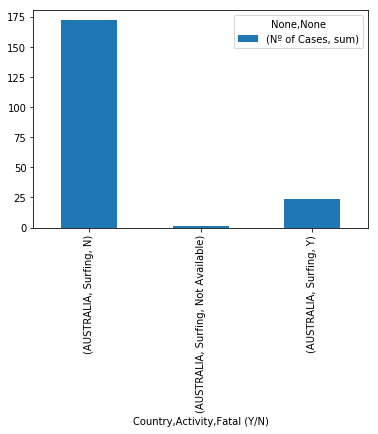

In [16]:
%matplotlib inline
Analysis.plot.bar()